# TESTING PURPOSES ONLY

In [1]:
!pip install torch torchvision efficientnet_pytorch


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import torch
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load dataset
train_dataset = datasets.ImageFolder(root='image', transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

In [3]:
print(len(train_loader))

313


In [4]:
import torchvision.models as models
from efficientnet_pytorch import EfficientNet

device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
print(device)

# Load pre-trained ResNet-50
resnet50 = models.resnet50()
resnet50.fc = torch.nn.Linear(resnet50.fc.in_features, 2)
resnet50.to(device)


mps


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [5]:
import torch.optim as optim
import torch.nn as nn
import numpy as np

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet50.parameters(), lr=0.01)

num_epochs = 10
resnet50.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    all_labels = []
    all_preds = []

    for epoch in range(num_epochs):
        running_loss = 0.0
    all_labels = []
    all_preds = []

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = resnet50(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(outputs.detach().cpu().numpy())

    all_preds = np.array(all_preds)
    all_probs = np.exp(all_preds) / np.sum(np.exp(all_preds), axis=1, keepdims=True)


    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

KeyboardInterrupt: 

/var/folders/d2/dsq0cfpj3wnf4dxf7hwsn5w00000gn/T/ipykernel_6115/2680483612.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet50.load_state_dict(torch.load('resnet50.

RuntimeError: Error(s) in loading state_dict for Sequential:
	Missing key(s) in state_dict: "0.weight", "1.weight", "1.bias", "1.running_mean", "1.running_var", "4.0.conv1.weight", "4.0.bn1.weight", "4.0.bn1.bias", "4.0.bn1.running_mean", "4.0.bn1.running_var", "4.0.conv2.weight", "4.0.bn2.weight", "4.0.bn2.bias", "4.0.bn2.running_mean", "4.0.bn2.running_var", "4.0.conv3.weight", "4.0.bn3.weight", "4.0.bn3.bias", "4.0.bn3.running_mean", "4.0.bn3.running_var", "4.0.downsample.0.weight", "4.0.downsample.1.weight", "4.0.downsample.1.bias", "4.0.downsample.1.running_mean", "4.0.downsample.1.running_var", "4.1.conv1.weight", "4.1.bn1.weight", "4.1.bn1.bias", "4.1.bn1.running_mean", "4.1.bn1.running_var", "4.1.conv2.weight", "4.1.bn2.weight", "4.1.bn2.bias", "4.1.bn2.running_mean", "4.1.bn2.running_var", "4.1.conv3.weight", "4.1.bn3.weight", "4.1.bn3.bias", "4.1.bn3.running_mean", "4.1.bn3.running_var", "4.2.conv1.weight", "4.2.bn1.weight", "4.2.bn1.bias", "4.2.bn1.running_mean", "4.2.bn1.running_var", "4.2.conv2.weight", "4.2.bn2.weight", "4.2.bn2.bias", "4.2.bn2.running_mean", "4.2.bn2.running_var", "4.2.conv3.weight", "4.2.bn3.weight", "4.2.bn3.bias", "4.2.bn3.running_mean", "4.2.bn3.running_var", "5.0.conv1.weight", "5.0.bn1.weight", "5.0.bn1.bias", "5.0.bn1.running_mean", "5.0.bn1.running_var", "5.0.conv2.weight", "5.0.bn2.weight", "5.0.bn2.bias", "5.0.bn2.running_mean", "5.0.bn2.running_var", "5.0.conv3.weight", "5.0.bn3.weight", "5.0.bn3.bias", "5.0.bn3.running_mean", "5.0.bn3.running_var", "5.0.downsample.0.weight", "5.0.downsample.1.weight", "5.0.downsample.1.bias", "5.0.downsample.1.running_mean", "5.0.downsample.1.running_var", "5.1.conv1.weight", "5.1.bn1.weight", "5.1.bn1.bias", "5.1.bn1.running_mean", "5.1.bn1.running_var", "5.1.conv2.weight", "5.1.bn2.weight", "5.1.bn2.bias", "5.1.bn2.running_mean", "5.1.bn2.running_var", "5.1.conv3.weight", "5.1.bn3.weight", "5.1.bn3.bias", "5.1.bn3.running_mean", "5.1.bn3.running_var", "5.2.conv1.weight", "5.2.bn1.weight", "5.2.bn1.bias", "5.2.bn1.running_mean", "5.2.bn1.running_var", "5.2.conv2.weight", "5.2.bn2.weight", "5.2.bn2.bias", "5.2.bn2.running_mean", "5.2.bn2.running_var", "5.2.conv3.weight", "5.2.bn3.weight", "5.2.bn3.bias", "5.2.bn3.running_mean", "5.2.bn3.running_var", "5.3.conv1.weight", "5.3.bn1.weight", "5.3.bn1.bias", "5.3.bn1.running_mean", "5.3.bn1.running_var", "5.3.conv2.weight", "5.3.bn2.weight", "5.3.bn2.bias", "5.3.bn2.running_mean", "5.3.bn2.running_var", "5.3.conv3.weight", "5.3.bn3.weight", "5.3.bn3.bias", "5.3.bn3.running_mean", "5.3.bn3.running_var", "6.0.conv1.weight", "6.0.bn1.weight", "6.0.bn1.bias", "6.0.bn1.running_mean", "6.0.bn1.running_var", "6.0.conv2.weight", "6.0.bn2.weight", "6.0.bn2.bias", "6.0.bn2.running_mean", "6.0.bn2.running_var", "6.0.conv3.weight", "6.0.bn3.weight", "6.0.bn3.bias", "6.0.bn3.running_mean", "6.0.bn3.running_var", "6.0.downsample.0.weight", "6.0.downsample.1.weight", "6.0.downsample.1.bias", "6.0.downsample.1.running_mean", "6.0.downsample.1.running_var", "6.1.conv1.weight", "6.1.bn1.weight", "6.1.bn1.bias", "6.1.bn1.running_mean", "6.1.bn1.running_var", "6.1.conv2.weight", "6.1.bn2.weight", "6.1.bn2.bias", "6.1.bn2.running_mean", "6.1.bn2.running_var", "6.1.conv3.weight", "6.1.bn3.weight", "6.1.bn3.bias", "6.1.bn3.running_mean", "6.1.bn3.running_var", "6.2.conv1.weight", "6.2.bn1.weight", "6.2.bn1.bias", "6.2.bn1.running_mean", "6.2.bn1.running_var", "6.2.conv2.weight", "6.2.bn2.weight", "6.2.bn2.bias", "6.2.bn2.running_mean", "6.2.bn2.running_var", "6.2.conv3.weight", "6.2.bn3.weight", "6.2.bn3.bias", "6.2.bn3.running_mean", "6.2.bn3.running_var", "6.3.conv1.weight", "6.3.bn1.weight", "6.3.bn1.bias", "6.3.bn1.running_mean", "6.3.bn1.running_var", "6.3.conv2.weight", "6.3.bn2.weight", "6.3.bn2.bias", "6.3.bn2.running_mean", "6.3.bn2.running_var", "6.3.conv3.weight", "6.3.bn3.weight", "6.3.bn3.bias", "6.3.bn3.running_mean", "6.3.bn3.running_var", "6.4.conv1.weight", "6.4.bn1.weight", "6.4.bn1.bias", "6.4.bn1.running_mean", "6.4.bn1.running_var", "6.4.conv2.weight", "6.4.bn2.weight", "6.4.bn2.bias", "6.4.bn2.running_mean", "6.4.bn2.running_var", "6.4.conv3.weight", "6.4.bn3.weight", "6.4.bn3.bias", "6.4.bn3.running_mean", "6.4.bn3.running_var", "6.5.conv1.weight", "6.5.bn1.weight", "6.5.bn1.bias", "6.5.bn1.running_mean", "6.5.bn1.running_var", "6.5.conv2.weight", "6.5.bn2.weight", "6.5.bn2.bias", "6.5.bn2.running_mean", "6.5.bn2.running_var", "6.5.conv3.weight", "6.5.bn3.weight", "6.5.bn3.bias", "6.5.bn3.running_mean", "6.5.bn3.running_var", "7.0.conv1.weight", "7.0.bn1.weight", "7.0.bn1.bias", "7.0.bn1.running_mean", "7.0.bn1.running_var", "7.0.conv2.weight", "7.0.bn2.weight", "7.0.bn2.bias", "7.0.bn2.running_mean", "7.0.bn2.running_var", "7.0.conv3.weight", "7.0.bn3.weight", "7.0.bn3.bias", "7.0.bn3.running_mean", "7.0.bn3.running_var", "7.0.downsample.0.weight", "7.0.downsample.1.weight", "7.0.downsample.1.bias", "7.0.downsample.1.running_mean", "7.0.downsample.1.running_var", "7.1.conv1.weight", "7.1.bn1.weight", "7.1.bn1.bias", "7.1.bn1.running_mean", "7.1.bn1.running_var", "7.1.conv2.weight", "7.1.bn2.weight", "7.1.bn2.bias", "7.1.bn2.running_mean", "7.1.bn2.running_var", "7.1.conv3.weight", "7.1.bn3.weight", "7.1.bn3.bias", "7.1.bn3.running_mean", "7.1.bn3.running_var", "7.2.conv1.weight", "7.2.bn1.weight", "7.2.bn1.bias", "7.2.bn1.running_mean", "7.2.bn1.running_var", "7.2.conv2.weight", "7.2.bn2.weight", "7.2.bn2.bias", "7.2.bn2.running_mean", "7.2.bn2.running_var", "7.2.conv3.weight", "7.2.bn3.weight", "7.2.bn3.bias", "7.2.bn3.running_mean", "7.2.bn3.running_var". 
	Unexpected key(s) in state_dict: "conv1.weight", "bn1.weight", "bn1.bias", "bn1.running_mean", "bn1.running_var", "bn1.num_batches_tracked", "layer1.0.conv1.weight", "layer1.0.bn1.weight", "layer1.0.bn1.bias", "layer1.0.bn1.running_mean", "layer1.0.bn1.running_var", "layer1.0.bn1.num_batches_tracked", "layer1.0.conv2.weight", "layer1.0.bn2.weight", "layer1.0.bn2.bias", "layer1.0.bn2.running_mean", "layer1.0.bn2.running_var", "layer1.0.bn2.num_batches_tracked", "layer1.0.conv3.weight", "layer1.0.bn3.weight", "layer1.0.bn3.bias", "layer1.0.bn3.running_mean", "layer1.0.bn3.running_var", "layer1.0.bn3.num_batches_tracked", "layer1.0.downsample.0.weight", "layer1.0.downsample.1.weight", "layer1.0.downsample.1.bias", "layer1.0.downsample.1.running_mean", "layer1.0.downsample.1.running_var", "layer1.0.downsample.1.num_batches_tracked", "layer1.1.conv1.weight", "layer1.1.bn1.weight", "layer1.1.bn1.bias", "layer1.1.bn1.running_mean", "layer1.1.bn1.running_var", "layer1.1.bn1.num_batches_tracked", "layer1.1.conv2.weight", "layer1.1.bn2.weight", "layer1.1.bn2.bias", "layer1.1.bn2.running_mean", "layer1.1.bn2.running_var", "layer1.1.bn2.num_batches_tracked", "layer1.1.conv3.weight", "layer1.1.bn3.weight", "layer1.1.bn3.bias", "layer1.1.bn3.running_mean", "layer1.1.bn3.running_var", "layer1.1.bn3.num_batches_tracked", "layer1.2.conv1.weight", "layer1.2.bn1.weight", "layer1.2.bn1.bias", "layer1.2.bn1.running_mean", "layer1.2.bn1.running_var", "layer1.2.bn1.num_batches_tracked", "layer1.2.conv2.weight", "layer1.2.bn2.weight", "layer1.2.bn2.bias", "layer1.2.bn2.running_mean", "layer1.2.bn2.running_var", "layer1.2.bn2.num_batches_tracked", "layer1.2.conv3.weight", "layer1.2.bn3.weight", "layer1.2.bn3.bias", "layer1.2.bn3.running_mean", "layer1.2.bn3.running_var", "layer1.2.bn3.num_batches_tracked", "layer2.0.conv1.weight", "layer2.0.bn1.weight", "layer2.0.bn1.bias", "layer2.0.bn1.running_mean", "layer2.0.bn1.running_var", "layer2.0.bn1.num_batches_tracked", "layer2.0.conv2.weight", "layer2.0.bn2.weight", "layer2.0.bn2.bias", "layer2.0.bn2.running_mean", "layer2.0.bn2.running_var", "layer2.0.bn2.num_batches_tracked", "layer2.0.conv3.weight", "layer2.0.bn3.weight", "layer2.0.bn3.bias", "layer2.0.bn3.running_mean", "layer2.0.bn3.running_var", "layer2.0.bn3.num_batches_tracked", "layer2.0.downsample.0.weight", "layer2.0.downsample.1.weight", "layer2.0.downsample.1.bias", "layer2.0.downsample.1.running_mean", "layer2.0.downsample.1.running_var", "layer2.0.downsample.1.num_batches_tracked", "layer2.1.conv1.weight", "layer2.1.bn1.weight", "layer2.1.bn1.bias", "layer2.1.bn1.running_mean", "layer2.1.bn1.running_var", "layer2.1.bn1.num_batches_tracked", "layer2.1.conv2.weight", "layer2.1.bn2.weight", "layer2.1.bn2.bias", "layer2.1.bn2.running_mean", "layer2.1.bn2.running_var", "layer2.1.bn2.num_batches_tracked", "layer2.1.conv3.weight", "layer2.1.bn3.weight", "layer2.1.bn3.bias", "layer2.1.bn3.running_mean", "layer2.1.bn3.running_var", "layer2.1.bn3.num_batches_tracked", "layer2.2.conv1.weight", "layer2.2.bn1.weight", "layer2.2.bn1.bias", "layer2.2.bn1.running_mean", "layer2.2.bn1.running_var", "layer2.2.bn1.num_batches_tracked", "layer2.2.conv2.weight", "layer2.2.bn2.weight", "layer2.2.bn2.bias", "layer2.2.bn2.running_mean", "layer2.2.bn2.running_var", "layer2.2.bn2.num_batches_tracked", "layer2.2.conv3.weight", "layer2.2.bn3.weight", "layer2.2.bn3.bias", "layer2.2.bn3.running_mean", "layer2.2.bn3.running_var", "layer2.2.bn3.num_batches_tracked", "layer2.3.conv1.weight", "layer2.3.bn1.weight", "layer2.3.bn1.bias", "layer2.3.bn1.running_mean", "layer2.3.bn1.running_var", "layer2.3.bn1.num_batches_tracked", "layer2.3.conv2.weight", "layer2.3.bn2.weight", "layer2.3.bn2.bias", "layer2.3.bn2.running_mean", "layer2.3.bn2.running_var", "layer2.3.bn2.num_batches_tracked", "layer2.3.conv3.weight", "layer2.3.bn3.weight", "layer2.3.bn3.bias", "layer2.3.bn3.running_mean", "layer2.3.bn3.running_var", "layer2.3.bn3.num_batches_tracked", "layer3.0.conv1.weight", "layer3.0.bn1.weight", "layer3.0.bn1.bias", "layer3.0.bn1.running_mean", "layer3.0.bn1.running_var", "layer3.0.bn1.num_batches_tracked", "layer3.0.conv2.weight", "layer3.0.bn2.weight", "layer3.0.bn2.bias", "layer3.0.bn2.running_mean", "layer3.0.bn2.running_var", "layer3.0.bn2.num_batches_tracked", "layer3.0.conv3.weight", "layer3.0.bn3.weight", "layer3.0.bn3.bias", "layer3.0.bn3.running_mean", "layer3.0.bn3.running_var", "layer3.0.bn3.num_batches_tracked", "layer3.0.downsample.0.weight", "layer3.0.downsample.1.weight", "layer3.0.downsample.1.bias", "layer3.0.downsample.1.running_mean", "layer3.0.downsample.1.running_var", "layer3.0.downsample.1.num_batches_tracked", "layer3.1.conv1.weight", "layer3.1.bn1.weight", "layer3.1.bn1.bias", "layer3.1.bn1.running_mean", "layer3.1.bn1.running_var", "layer3.1.bn1.num_batches_tracked", "layer3.1.conv2.weight", "layer3.1.bn2.weight", "layer3.1.bn2.bias", "layer3.1.bn2.running_mean", "layer3.1.bn2.running_var", "layer3.1.bn2.num_batches_tracked", "layer3.1.conv3.weight", "layer3.1.bn3.weight", "layer3.1.bn3.bias", "layer3.1.bn3.running_mean", "layer3.1.bn3.running_var", "layer3.1.bn3.num_batches_tracked", "layer3.2.conv1.weight", "layer3.2.bn1.weight", "layer3.2.bn1.bias", "layer3.2.bn1.running_mean", "layer3.2.bn1.running_var", "layer3.2.bn1.num_batches_tracked", "layer3.2.conv2.weight", "layer3.2.bn2.weight", "layer3.2.bn2.bias", "layer3.2.bn2.running_mean", "layer3.2.bn2.running_var", "layer3.2.bn2.num_batches_tracked", "layer3.2.conv3.weight", "layer3.2.bn3.weight", "layer3.2.bn3.bias", "layer3.2.bn3.running_mean", "layer3.2.bn3.running_var", "layer3.2.bn3.num_batches_tracked", "layer3.3.conv1.weight", "layer3.3.bn1.weight", "layer3.3.bn1.bias", "layer3.3.bn1.running_mean", "layer3.3.bn1.running_var", "layer3.3.bn1.num_batches_tracked", "layer3.3.conv2.weight", "layer3.3.bn2.weight", "layer3.3.bn2.bias", "layer3.3.bn2.running_mean", "layer3.3.bn2.running_var", "layer3.3.bn2.num_batches_tracked", "layer3.3.conv3.weight", "layer3.3.bn3.weight", "layer3.3.bn3.bias", "layer3.3.bn3.running_mean", "layer3.3.bn3.running_var", "layer3.3.bn3.num_batches_tracked", "layer3.4.conv1.weight", "layer3.4.bn1.weight", "layer3.4.bn1.bias", "layer3.4.bn1.running_mean", "layer3.4.bn1.running_var", "layer3.4.bn1.num_batches_tracked", "layer3.4.conv2.weight", "layer3.4.bn2.weight", "layer3.4.bn2.bias", "layer3.4.bn2.running_mean", "layer3.4.bn2.running_var", "layer3.4.bn2.num_batches_tracked", "layer3.4.conv3.weight", "layer3.4.bn3.weight", "layer3.4.bn3.bias", "layer3.4.bn3.running_mean", "layer3.4.bn3.running_var", "layer3.4.bn3.num_batches_tracked", "layer3.5.conv1.weight", "layer3.5.bn1.weight", "layer3.5.bn1.bias", "layer3.5.bn1.running_mean", "layer3.5.bn1.running_var", "layer3.5.bn1.num_batches_tracked", "layer3.5.conv2.weight", "layer3.5.bn2.weight", "layer3.5.bn2.bias", "layer3.5.bn2.running_mean", "layer3.5.bn2.running_var", "layer3.5.bn2.num_batches_tracked", "layer3.5.conv3.weight", "layer3.5.bn3.weight", "layer3.5.bn3.bias", "layer3.5.bn3.running_mean", "layer3.5.bn3.running_var", "layer3.5.bn3.num_batches_tracked", "layer4.0.conv1.weight", "layer4.0.bn1.weight", "layer4.0.bn1.bias", "layer4.0.bn1.running_mean", "layer4.0.bn1.running_var", "layer4.0.bn1.num_batches_tracked", "layer4.0.conv2.weight", "layer4.0.bn2.weight", "layer4.0.bn2.bias", "layer4.0.bn2.running_mean", "layer4.0.bn2.running_var", "layer4.0.bn2.num_batches_tracked", "layer4.0.conv3.weight", "layer4.0.bn3.weight", "layer4.0.bn3.bias", "layer4.0.bn3.running_mean", "layer4.0.bn3.running_var", "layer4.0.bn3.num_batches_tracked", "layer4.0.downsample.0.weight", "layer4.0.downsample.1.weight", "layer4.0.downsample.1.bias", "layer4.0.downsample.1.running_mean", "layer4.0.downsample.1.running_var", "layer4.0.downsample.1.num_batches_tracked", "layer4.1.conv1.weight", "layer4.1.bn1.weight", "layer4.1.bn1.bias", "layer4.1.bn1.running_mean", "layer4.1.bn1.running_var", "layer4.1.bn1.num_batches_tracked", "layer4.1.conv2.weight", "layer4.1.bn2.weight", "layer4.1.bn2.bias", "layer4.1.bn2.running_mean", "layer4.1.bn2.running_var", "layer4.1.bn2.num_batches_tracked", "layer4.1.conv3.weight", "layer4.1.bn3.weight", "layer4.1.bn3.bias", "layer4.1.bn3.running_mean", "layer4.1.bn3.running_var", "layer4.1.bn3.num_batches_tracked", "layer4.2.conv1.weight", "layer4.2.bn1.weight", "layer4.2.bn1.bias", "layer4.2.bn1.running_mean", "layer4.2.bn1.running_var", "layer4.2.bn1.num_batches_tracked", "layer4.2.conv2.weight", "layer4.2.bn2.weight", "layer4.2.bn2.bias", "layer4.2.bn2.running_mean", "layer4.2.bn2.running_var", "layer4.2.bn2.num_batches_tracked", "layer4.2.conv3.weight", "layer4.2.bn3.weight", "layer4.2.bn3.bias", "layer4.2.bn3.running_mean", "layer4.2.bn3.running_var", "layer4.2.bn3.num_batches_tracked", "fc.weight", "fc.bias". 

In [32]:
all_features = []
all_labels = []

with torch.no_grad():
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        features = resnet50(inputs)
        features = features.view(features.size(0), -1)  
        all_features.append(features.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

all_features = np.concatenate(all_features, axis=0)
all_labels = np.array(all_labels)

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
features_2d = tsne.fit_transform(all_features)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], c=all_labels, cmap='viridis')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title("t-SNE visualization of ResNet50 extracted features")
plt.xlabel("t-SNE feature 1")
plt.ylabel("t-SNE feature 2")
plt.colorbar()
plt.show()

In [25]:
dataset = datasets.ImageFolder(root='image', transform=transform)
dataset_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

In [26]:
print(len(train_loader))

190


In [27]:
all_features = []
all_labels = []

with torch.no_grad():
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        features = resnet50(inputs)
        features = features.view(features.size(0), -1)  
        all_features.append(features.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

all_features = np.concatenate(all_features, axis=0)
all_labels = np.array(all_labels)

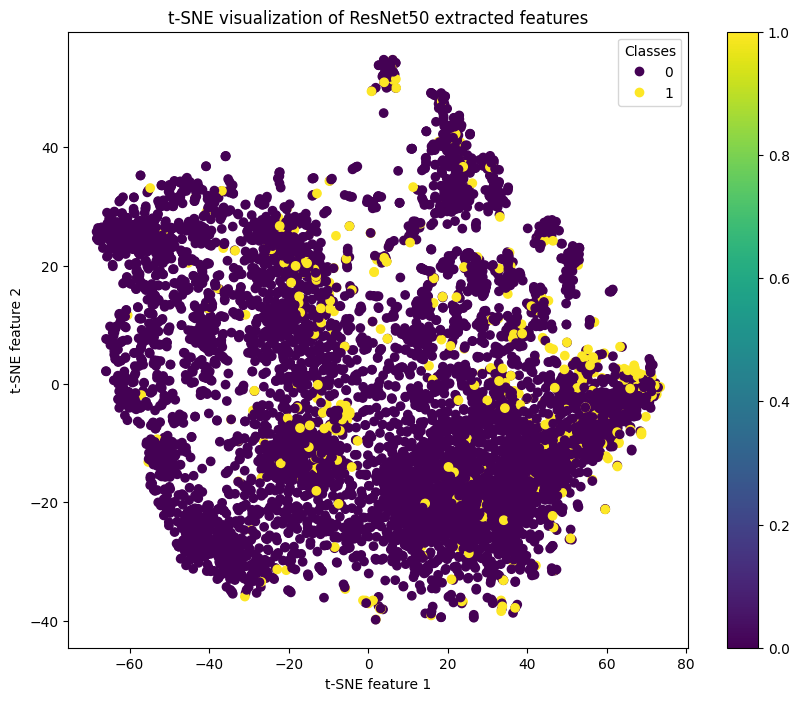

In [28]:
tsne = TSNE(n_components=2, random_state=42)
features_2d = tsne.fit_transform(all_features)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], c=all_labels, cmap='viridis')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title("t-SNE visualization of ResNet50 extracted features")
plt.xlabel("t-SNE feature 1")
plt.ylabel("t-SNE feature 2")
plt.colorbar()
plt.show()